In [1]:
import iplantuml



In [2]:
%%plantuml

@startuml

package org {
    class org_crud {
        create
        read
        update
        delete
    }
    
    class cases_crud {
        create
        read
        update
        delete
    }
    
}

package common {
    class auth_crud {
        validate
        login
        update
        delete
    }
    class mail_crud {
        new_case
        notifiy
    }
    class db {
        login
        orgs
        cases
    }
}
@enduml



Writing output for /home/julio/Projects/anjana/ac91e3ae-441a-4ed5-9f88-025b1209a7bf.uml to ac91e3ae-441a-4ed5-9f88-025b1209a7bf.svg


Writing output for /home/julio/Projects/anjana/8ad09695-9885-423b-aa62-890e9ae1c789.uml to 8ad09695-9885-423b-aa62-890e9ae1c789.svg


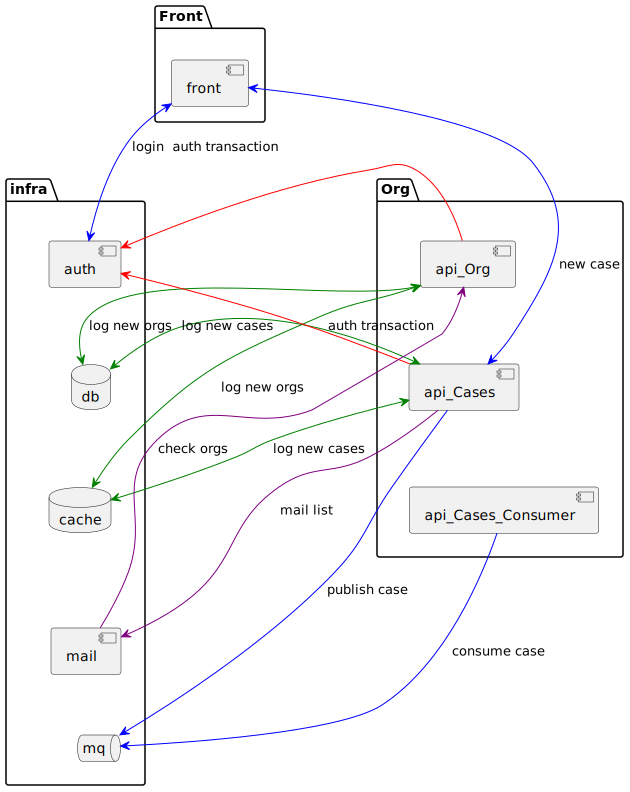

In [28]:
%%plantuml

@startuml



folder Org {
    component api_Org
    component api_Cases
    component api_Cases_Consumer
    
    api_Org -[hidden]d-> api_Cases
    api_Cases -[hidden]d-> api_Cases_Consumer
}

folder Front {
    component front
}

 
folder infra {
    component auth
    database db
    database cache
    component mail
    queue mq 
    
    auth -[hidden]d-> db
    db -[hidden]d-> cache
    cache -[hidden]-> mail
    mail -[hidden]-> mq
    
}

front -[hidden]d-> Org
front -[hidden]r-> infra
Org -[hidden]l-> infra


front <-right-> auth       #blue :login 
front <-down-> api_Cases  #blue :new case
api_Cases -right-> mq #blue      :publish case
api_Cases_Consumer -right-> mq #blue      :consume case

api_Org <-down-> db #green        :log new orgs
api_Cases <-down-> db #green       :log new cases
api_Org <-down-> cache #green        :log new orgs
api_Cases <-down-> cache #green       :log new cases


api_Org -left-> auth #red       :auth transaction
api_Cases -left-> auth #red      :auth transaction

api_Org <-right- mail #purple       :check orgs
api_Cases -down-> mail #purple      :mail list


@enduml



In [4]:
%%plantuml

autonumber

@startuml
Actor       user   #green
Participant front  #lightgreen 
Participant auth   #orange 
Queue mq     #orange
Participant mail   #lightblue
Participant orgs   #lightblue
Participant cases  #lightblue
Participant cases_consumer  #lightblue
Actor       agent  #yellow
Database    cache     #red
Database    db     #red

user  -> front   : login
front ->  auth    : req token\n/login
auth  --> user    : get token\n/validate
user  -> front   : new case
front -> cases   : reques new case
cases -> mq   : publish new case
cases_consumer -> mq : consume msg\nsave in db
cases_consumer -> db : save in db
cases -> mail    : mail to list\n/mail/new
mail  -> orgs    : get orgs type\n/orgs/get
mail  -> agent   : notify\n new case\nto list type\n /mail/new
agent  -> mail   : reply email\ntake case\n/mail/inbound\n
mail  ->  cases  : case taken

cases  -> db     : log case agent\n/cases/update
cases  -> mail   : case taken\n/mail/notify
mail   -> user   : case taken

@endumllightblue

Writing output for /home/julio/Projects/anjana/83de2993-f5fc-47aa-847a-99234822218b.uml to 83de2993-f5fc-47aa-847a-99234822218b.svg
